In [19]:
import pandas as pd
import ast

In [4]:
df = pd.read_csv('pdfConvertwTopics.csv', sep = '|')

In [55]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,0,1,topics,correctTopic
0,0,0,"IS 100 A, ONL SP21 Exploring the iSchool (Torr...",exploring the ischool with a humancentered len...,"[(1, 0.25459787), (2, 0.019638633), (3, 0.7191...",3
1,1,1,"IS 567 BC FA22 Text Mining (Blake, C).pdf",syllabus for is567 ac text mining fall 2022...,"[(0, 0.027653696), (1, 0.53366435), (2, 0.0553...",1
2,2,2,"IS 507 AC, BC FA22 Data, Stat, Info (Besser, S...",course instructor information course and inst...,"[(0, 0.24019106), (1, 0.5914509), (2, 0.023031...",1
3,3,3,"IS 413 BO SP21 Teen Materials (Quealy, K).pdf",1 is 413ab sp1 teen materials spring 2021 mond...,"[(0, 0.10561068), (1, 0.14296731), (2, 0.05782...",3
4,4,4,IS 584 PVO FA20 Privacy in the Internet Age (B...,privacy in the internet age lis 584 pvo fall 2...,"[(0, 0.41424912), (1, 0.17968874), (2, 0.21206...",2
5,5,5,IS 458 AO FA19 Instruc Strat Tech Info Prof (W...,is458\tinstructional\tstrategies\tand\ttechniq...,"[(0, 0.06072541), (1, 0.74616015), (3, 0.19047...",1
6,6,6,"IS 401 ACG, ACU FA22 Introduction to Networked...",1 introduction to networked information...,"[(0, 0.09093158), (1, 0.24737555), (2, 0.03140...",3
7,7,7,GSD 102 AL FA22 Intro to the Videogame Industr...,gsd 102 introduction to the video game industr...,"[(0, 0.041342758), (1, 0.5435911), (2, 0.41400...",1
8,8,8,IS 445 AO SP20 Info Books & Resources Youth (M...,is445 ao information books and resources for y...,"[(0, 0.06049179), (1, 0.80199593), (2, 0.02963...",1
9,9,9,GSD 390 DBU FA22 Introduction to Unreal (Baird...,gsd 390 – introduction to unreal general inf...,"[(0, 0.05539466), (1, 0.115126975), (2, 0.5677...",2


In [24]:
list(ast.literal_eval(df['topics'][1]))[0][1]

0.027653696

In [30]:
correctTopic = []
for i in df['topics']:
    tmp = list(ast.literal_eval(i))
    maxVal = 0
    cl = ''
    for j in tmp:
        if j[1] > maxVal and j[0] != 0:
            cl = j[0]
            maxVal = j[1]
    correctTopic.append(cl)

In [32]:
df['correctTopic'] = correctTopic

In [33]:
df.head()

,Unnamed: 0.1,Unnamed: 0,0,1,topics,correctTopic
0,0,0,"IS 100 A, ONL SP21 Exploring the iSchool (Torr...",exploring the ischool with a humancentered len...,"[(1, 0.25459787), (2, 0.019638633), (3, 0.7191...",3
1,1,1,"IS 567 BC FA22 Text Mining (Blake, C).pdf",syllabus for is567 ac text mining fall 2022...,"[(0, 0.027653696), (1, 0.53366435), (2, 0.0553...",1
2,2,2,"IS 507 AC, BC FA22 Data, Stat, Info (Besser, S...",course instructor information course and inst...,"[(0, 0.24019106), (1, 0.5914509), (2, 0.023031...",1
3,3,3,"IS 413 BO SP21 Teen Materials (Quealy, K).pdf",1 is 413ab sp1 teen materials spring 2021 mond...,"[(0, 0.10561068), (1, 0.14296731), (2, 0.05782...",3
4,4,4,IS 584 PVO FA20 Privacy in the Internet Age (B...,privacy in the internet age lis 584 pvo fall 2...,"[(0, 0.41424912), (1, 0.17968874), (2, 0.21206...",2


In [34]:
df1 = df[df['correctTopic'] == 1]
df2 = df[df['correctTopic'] == 2]
df3 = df[df['correctTopic'] == 3]

In [36]:
print(len(df1))
print(len(df2))
print(len(df3))

339
93
332


In [44]:
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
#spell correction
#from autocorrect import spell
data = []
for i in range(df3.shape[0]):
    sms = df3.iloc[i, 3]
    # remove non alphabatic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)
    # make words lowercase, because Go and go will be considered as two words
    sms = sms.lower()
    # tokenising
    tokenized_sms = wt(sms)
    # remove stop words and stemming
    sw = stopwords.words('english')
    sw.extend(['cid','student','cours','class','assign','inform','read','week','grade','univers','use','work','learn',
'instructor','due','academi','requir','may','illinoi','complet','pleas','materi','ischool','respons','meet','lectur','final',
'librari','academ','includ','resourc','contact','must'])
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(sw):
            sms_processed.append((stemmer.stem(word)))
    sms_text = " ".join(sms_processed)
    data.append(sms_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fjsti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fjsti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


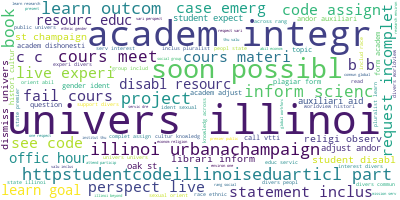

In [45]:
from wordcloud import WordCloud

long_string = ','.join(list(data))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [71]:
courseNumbers = []
firstval = []
for i in df['0']:
    if i[0] == 'I' and i[1] == 'S':
        courseNumbers.append(i[3:6])
    elif i[0] == 'G':
        courseNumbers.append(i[4:7])
    elif i[0] == 'I' and i[1] == 'N':
        courseNumbers.append(i[5:8])
    elif i[0] == 'W':
        courseNumbers.append(i[5:8])
    firstval.append(i[0])

In [78]:
courseNumbers.append('0')

In [80]:
df['courseNumbers'] = courseNumbers

In [81]:
df.head()

,Unnamed: 0.1,Unnamed: 0,0,1,topics,correctTopic,courseNumbers
0,0,0,"IS 100 A, ONL SP21 Exploring the iSchool (Torr...",exploring the ischool with a humancentered len...,"[(1, 0.25459787), (2, 0.019638633), (3, 0.7191...",3,100
1,1,1,"IS 567 BC FA22 Text Mining (Blake, C).pdf",syllabus for is567 ac text mining fall 2022...,"[(0, 0.027653696), (1, 0.53366435), (2, 0.0553...",1,567
2,2,2,"IS 507 AC, BC FA22 Data, Stat, Info (Besser, S...",course instructor information course and inst...,"[(0, 0.24019106), (1, 0.5914509), (2, 0.023031...",1,507
3,3,3,"IS 413 BO SP21 Teen Materials (Quealy, K).pdf",1 is 413ab sp1 teen materials spring 2021 mond...,"[(0, 0.10561068), (1, 0.14296731), (2, 0.05782...",3,413
4,4,4,IS 584 PVO FA20 Privacy in the Internet Age (B...,privacy in the internet age lis 584 pvo fall 2...,"[(0, 0.41424912), (1, 0.17968874), (2, 0.21206...",2,584


In [82]:
df1 = df[df['correctTopic'] == 1]
df2 = df[df['correctTopic'] == 2]
df3 = df[df['correctTopic'] == 3]

In [97]:
import matplotlib.pyplot as plt
import math

In [98]:
#def roundDown(x):
#    return int(math.floor(x / 100.0)) * 100

In [218]:
courses1 = df1['courseNumbers'].to_numpy()
courses2 = df2['courseNumbers'].to_numpy()
courses3 = df3['courseNumbers'].to_numpy()

In [223]:
for i in range(len(courses3)):
    courses3[i] = int(courses3[i])

In [125]:
import numpy as np

In [215]:
dfCourses = dfCourses[:-1]

In [216]:
dfCourses

[100,
 567,
 507,
 413,
 584,
 458,
 401,
 102,
 445,
 390,
 467,
 577,
 590,
 226,
 583,
 571,
 562,
 419,
 590,
 542,
 101,
 545,
 501,
 545,
 471,
 101,
 100,
 510,
 490,
 423,
 505,
 592,
 590,
 446,
 401,
 226,
 501,
 597,
 539,
 142,
 467,
 575,
 430,
 595,
 404,
 562,
 581,
 510,
 236,
 562,
 590,
 501,
 451,
 502,
 582,
 505,
 515,
 590,
 580,
 311,
 436,
 525,
 567,
 455,
 303,
 551,
 471,
 419,
 502,
 590,
 591,
 578,
 544,
 529,
 507,
 461,
 528,
 502,
 101,
 324,
 590,
 515,
 544,
 364,
 597,
 101,
 420,
 400,
 517,
 407,
 573,
 569,
 585,
 204,
 204,
 582,
 510,
 563,
 590,
 595,
 424,
 561,
 504,
 583,
 501,
 561,
 585,
 563,
 504,
 542,
 590,
 445,
 538,
 505,
 497,
 542,
 266,
 467,
 502,
 563,
 562,
 577,
 403,
 303,
 199,
 590,
 327,
 537,
 530,
 541,
 523,
 560,
 501,
 587,
 507,
 471,
 590,
 429,
 456,
 505,
 507,
 544,
 491,
 445,
 206,
 517,
 571,
 423,
 308,
 501,
 597,
 455,
 582,
 586,
 530,
 505,
 593,
 502,
 504,
 541,
 501,
 575,
 413,
 505,
 505,
 518,
 458

In [165]:
a = range(100,600,100)
print(a)

range(100, 600, 100)


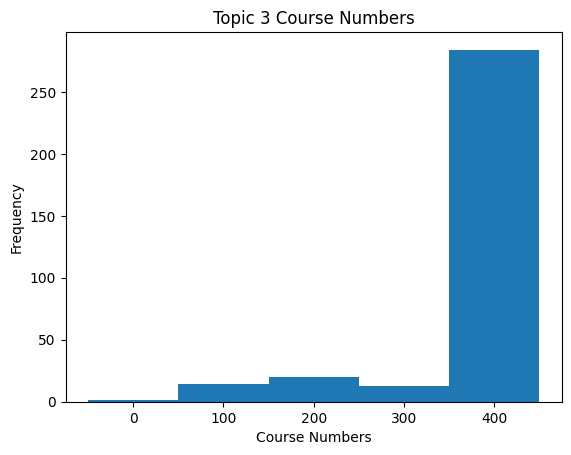

In [224]:
n_bins = 5
plt.hist(courses3, bins = 5, align = 'left')
#plt.xticks(range(100,600,100))
plt.title('Topic 3 Course Numbers')
plt.ylabel('Frequency')
plt.xlabel('Course Numbers')
plt.show()